In [4]:
import pandas as pd
%pylab inline
import spectrum
import thecannon as tc

# code to generate chisq df
chisq_df = pd.DataFrame()
for order_n in range(1,17):
    df = pd.read_csv('./data/cannon_models/rchip_order{}_dwt/cannon_labels.csv'.format(order_n))
    df = df[['id_starname','chisq']].rename(columns={"chisq": 'order {}'.format(order_n)})
    if len(chisq_df)==0:
        chisq_df = df
    else:
        chisq_df = pd.merge(chisq_df, df)
chisq_df.to_csv('/Users/isabelangelo/Desktop/cks_cannon_chi-squared.csv')

chisq_df = pd.read_csv('/Users/isabelangelo/Desktop/cks_cannon_chi-squared.csv', index_col=False)
chisq_df = chisq_df.drop(columns=['order 11', 'order 12'])
chisq_df

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,Unnamed: 0,id_starname,order 1,order 2,order 3,order 4,order 5,order 6,order 7,order 8,order 9,order 10,order 13,order 14,order 15,order 16
0,0,K00001,1492.278565,1447.036711,1344.287835,1376.328855,1365.399557,1485.502093,1560.794261,1553.904444,1551.895502,1627.288156,1690.219794,1628.132654,1092.943963,1770.172314
1,1,K00002,1527.507135,1571.824916,1601.986975,1447.230189,1545.153140,1689.014869,1550.215867,1691.864542,1705.307353,1739.391551,1659.716637,1844.932172,1158.858712,1810.709028
2,2,K00003,2002.309097,1877.341237,1706.528431,1835.887525,1611.947422,1712.309446,1713.315116,1613.652649,1790.410575,1795.254834,1818.480378,1692.233923,1354.258239,1729.637147
3,3,K00006,1819.645338,1564.051107,1602.318307,1503.241555,1679.730819,1515.516818,1620.609197,2744.376630,1743.870551,1807.233276,1651.490920,1671.652310,1141.455893,2181.082446
4,4,K00007,2257.423618,1982.895053,1889.230336,1385.832037,1412.382225,1512.971813,1512.284036,3110.455269,1690.567123,1576.379237,1602.442953,1677.779074,1103.705734,2137.228235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,949,K05393,1766.195954,1574.435502,1361.346161,1376.851987,1572.983432,1483.855351,1660.767856,1795.841115,1610.844556,1740.394710,1835.141252,1731.126645,1161.273444,1772.284172
950,950,K05782,1432.854585,2365.300047,1353.964788,1241.885063,1389.396210,1411.687657,1442.156153,1545.082730,1462.886357,1415.157250,1579.223967,1597.137615,998.452232,1606.105718
951,951,K05900,1468.391286,1414.577778,1469.701539,1469.840862,1370.906849,1666.116815,1572.209113,1556.732579,1588.580501,1625.677353,1478.530373,1616.195778,1099.963765,1725.313880
952,952,K05949,1775.509623,1577.094429,1437.767697,1537.845653,1438.953963,1567.037863,1589.022044,1660.904164,1658.928671,1636.714173,1713.890341,1713.873001,1084.464851,1796.369725


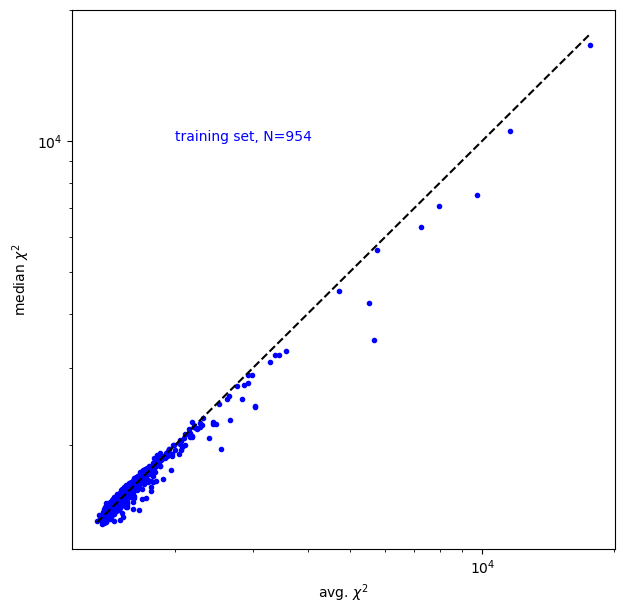

In [9]:
# plot of mean versus median chi-squared

figure(figsize=(7,7))

x1,x2,y1,y2 = 900,3e4,900,3e4
#plot([x1,x2],[y1,y2],'k--')
m=(y2-y1)/(x2-x1)
def y_cutoff(x):
    y_cutoff = m*(x-x1) + y1
    return y_cutoff

mean_chisq_values = []
median_chisq_values = []
#poorly_shifted_stars=[]
for star in chisq_df.id_starname:
    row = chisq_df[chisq_df.id_starname==star].iloc[0]
    chisq_arr = row.to_numpy()[2:]
    mean_chisq = np.mean(chisq_arr)
    median_chisq = np.median(chisq_arr)
    mean_chisq_values.append(mean_chisq)
    median_chisq_values.append(median_chisq)
#     if abs(median_chisq-y_cutoff(mean_chisq))>200 and median_chisq<1.7e3:
#         plot(mean_chisq, median_chisq, '.', color='goldenrod', alpha=0.5)
#         poorly_shifted_stars.append(star)
#     if star in ['K00003', 'K01888','K02110','K02228','K04021', 'K00176', 'K01054', 'K03890', 'K03244']:
#         plot(mean_chisq, median_chisq, 'r.', alpha=0.5)
#         text(mean_chisq, median_chisq, star, color='r', fontsize=8)
plot(mean_chisq_values, median_chisq_values, '.', color='b', zorder=0)

# plot the boundaries of the cutoff
plot(np.sort(mean_chisq_values), [y_cutoff(i) for i in np.sort(mean_chisq_values)], 'k--')


#text(2e3,1.3e4,'N={}'.format(len(poorly_shifted_stars)), color='goldenrod')
text(2e3, 1e4, 'training set, N={}'.format(len(chisq_df)), color='b')


xlabel(r'avg. $\chi^2$')
ylabel(r'median $\chi^2$')
#ylim(40,1e5)
xscale('log');yscale('log')

#print(np.array(poorly_shifted_stars))

In [2]:
# load training spectra
training_flux_df = pd.read_csv('./data/cannon_training_data/OLD/training_flux_orders_11-12_omitted_dwt.csv')
training_sigma_df = pd.read_csv('./data/cannon_training_data/OLD/training_sigma_orders_11-12_omitted_dwt.csv')

# load metrics 
training_metrics = pd.read_csv('./data/cannon_models/OLD/rchip_orders_11-12_omitted_dwt_cannon_labels.csv')

# spectrum object inputs
order_numbers = [i for i in np.arange(1,17,1).tolist() if i not in [11,12]]
model = tc.CannonModel.read('./data/cannon_models/OLD/rchip_orders_11-12_omitted_dwt.model')

FileNotFoundError: [Errno 2] No such file or directory: './data/cannon_training_data/OLD/training_flux_orders_11-12_omitted_dwt.csv'

In [ ]:
# plot each spectrum with it's average and standard deviation

figure(figsize=(15,5))
x_values = []
y_values = []
yerr_values = []
n_poorly_shifted=0
for star in chisq_df.id_starname:
    row = chisq_df[chisq_df.id_starname==star].iloc[0]
    chisq_arr = row.to_numpy()[2:]
    x = row.to_numpy()[0]
    y = np.mean(chisq_arr)
    yerr = chisq_arr.std()
    x_values.append(x)
    y_values.append(y)
    yerr_values.append(yerr)
    if star in ['K00003', 'K01888','K02110','K02228','K04021', 'K00176']:
        print(yerr)
        errorbar(x,y,yerr=yerr,fmt='o',color='r',elinewidth=1.5)
        text(x,y, '{}\n err={}'.format(star, yerr.round(1)), color='r')
    if y>=1.3e3 and yerr>=650:
        errorbar(x,y,yerr=yerr,fmt='o',color='goldenrod',elinewidth=1.5, alpha=0.6)
        n_poorly_shifted += 1
    axhline(1.3e3, color='k',lw=0.5,ls='--')

errorbar(x_values, y_values, yerr=yerr_values, fmt='o', color='lightgrey', elinewidth=0.5, zorder=0)
text(800,1e5,'N={}'.format(n_poorly_shifted), color='goldenrod')
yscale('log')
ylim(0,2e5)
xlabel('star number')
ylabel('chi-squared')

In [ ]:
# old version based on mean chisq versus median chisq

# figure(figsize=(7,7))

# plot one to one line, define cutoff

x1,x2,y1,y2 = 900,3e4,900,3e4
#plot([x1,x2],[y1,y2],'k--')
m=(y2-y1)/(x2-x1)
def y_cutoff(x):
    y_cutoff = m*(x-x1) + y1
    return y_cutoff

mean_chisq_values = []
median_chisq_values = []
poorly_shifted_stars=[]
for star in chisq_df.id_starname:
    row = chisq_df[chisq_df.id_starname==star].iloc[0]
    chisq_arr = row.to_numpy()[2:]
    mean_chisq = np.mean(chisq_arr)
    median_chisq = np.median(chisq_arr)
    mean_chisq_values.append(mean_chisq)
    median_chisq_values.append(median_chisq)
    if abs(median_chisq-y_cutoff(mean_chisq))>200 and median_chisq<1.7e3:
        plot(mean_chisq, median_chisq, '.', color='goldenrod', alpha=0.5)
        poorly_shifted_stars.append(star)
    if star in ['K00003', 'K01888','K02110','K02228','K04021', 'K00176', 'K01054', 'K03890', 'K03244']:
        plot(mean_chisq, median_chisq, 'r.', alpha=0.5)
        text(mean_chisq, median_chisq, star, color='r', fontsize=8)
plot(mean_chisq_values, median_chisq_values, '.', color='lightgrey', zorder=0)

# plot the boundaries of the cutoff
plot(np.sort(mean_chisq_values), [y_cutoff(i) for i in np.sort(mean_chisq_values)], 'k--')
# axhline(y1, color='k',ls='--')


text(2e3,1.3e4,'N={}'.format(len(poorly_shifted_stars)), color='goldenrod')
text(2e3, 1e4, 'training set, N={}'.format(len(chisq_df)), color='grey')


xlabel(r'avg. $\chi^2$')
ylabel(r'median $\chi^2$')
#ylim(40,1e5)
xscale('log');yscale('log')

print(np.array(poorly_shifted_stars))

In [ ]:
# I need to (1) plot the line cutoff
# (2) inspect the one that's not in the line currently
# or just change the line?



x1,x2,y1,y2 = 1.7e3, 2e4, 650, 2e4
m=(y2-y1)/(x2-x1)
def y_cutoff(x):
    y_cutoff = m*(x-x1) + y1
    return y_cutoff


figure(figsize=(7,7))
mean_chisq_values = []
std_chisq_values = []
poorly_shifted_stars = []
for star in chisq_df.id_starname:
    row = chisq_df[chisq_df.id_starname==star].iloc[0]
    chisq_arr = row.to_numpy()[2:]
    mean_chisq = np.mean(chisq_arr)
    std_chisq = np.std(chisq_arr)
    mean_chisq_values.append(mean_chisq)
    std_chisq_values.append(std_chisq)
    #if mean_chisq>=xmin and std_chisq>=ymin:
    if std_chisq>=y_cutoff(mean_chisq) and std_chisq>=y1:
        plot(mean_chisq, std_chisq, 'o', color='goldenrod', alpha=0.5)
        poorly_shifted_stars.append(star)
    if star in ['K00003', 'K01888','K02110','K02228','K04021', 'K00176']:
        plot(mean_chisq, std_chisq, 'ro')
        text(mean_chisq, std_chisq, star, color='r', fontsize=8)
        
plot(mean_chisq_values, std_chisq_values, 'o', color='lightgrey', zorder=0)

# plot the boundaries of the cutoff
plot(np.sort(mean_chisq_values), [y_cutoff(i) for i in np.sort(mean_chisq_values)], 'k--')
axhline(y1, color='k',ls='--')


text(2e3,4e4,'N={}'.format(len(poorly_shifted_stars)), color='goldenrod')
text(2e3, 6e4, 'training set, N={}'.format(len(chisq_df)), color='grey')
xscale('log');yscale('log')
xlabel(r'avg. $\chi^2$')
ylabel(r'std. $\chi^2$')
ylim(40,1e5)

In [ ]:
# next: plot stars categorized as poorly shifted to see if it's accurate
# I need to load the old training set, since it has the poorly shifted ones
# KOI-3 and KOI-1054 need to be in there.
# KOI-3890 looks fine, but K01054 is poorly shifted
# so this metric has some false positives.

np.array(poorly_shifted_stars)

In [ ]:
# plot stars in each category to check thresholds
# problem: the truly poorly shifted ones were removed
# I need to use the old dataframes

# false positives in poorly shifted stars:
# (I can plot these to see the cutoff)
# K03890, K03244, K02884

# poorly_shifted_stars = np.array(['K00003', 'K00020', 'K00176', 'K00486', 
#     'K00551', 'K00658', 'K01054', 'K01230', 'K01299', 'K01431', 'K01576', 
#     'K01754','K01886', 'K01888', 'K02053', 'K02110', 'K02228', 'K02260',
#     'K02312', 'K02409', 'K02729', 'K02748', 'K02884', 'K03158','K03168', 
#     'K03244', 'K03315', 'K03780', 'K04021', 'K04230','K04374', 'K02864']) 
#poorly_shifted_stars = np.array(['K00097', 'K00401', 'K00719', 'K02859', 'K03890'])

figure(figsize=(15,20))
subplot(121);title('flagged for shifting errors')
i=0
for star in poorly_shifted_stars:
    spec = spectrum.Spectrum(
        training_flux_df[star], 
        training_sigma_df[star], 
        order_numbers, 
        model)
    spec.fit_single_star()
    axhline(i, color='b', alpha=0.5)
    plot(spec.wav,spec.residuals+i, 'k-', lw=0.5)
    text(6300,i+0.1,star)
    i+=1
    
subplot(122);title('remaining in training set')
i=0
for star in chisq_df.id_starname:
    if star not in poorly_shifted_stars:
        spec = spectrum.Spectrum(
            training_flux_df[star], 
            training_sigma_df[star], 
            order_numbers, 
            model)
        spec.fit_single_star()
        axhline(i, color='b', alpha=0.5)
        plot(spec.wav,spec.residuals+i, 'k-', lw=0.5)
        text(6300,i+0.1,star)
        i+=1
        if i==len(poorly_shifted_stars):
            break

In [ ]:
spectrum.Spectrum(
            training_flux_df['K00401'], 
            training_sigma_df['K00401'], 
            order_numbers, 
            model).plot_fit(1,8)

In [ ]:
spectrum.Spectrum(
            training_flux_df['K03158'], 
            training_sigma_df['K03158'], 
            order_numbers, 
            model).plot_fit(6,14)

In [ ]:
spectrum.Spectrum(
            training_flux_df['K03244'], 
            training_sigma_df['K03244'], 
            order_numbers, 
            model).plot_fit(1,3)

In [ ]:
# check how many poorly shifted stars are binaries


known_binaries = pd.read_csv('./data/label_dataframes/known_binary_labels.csv')
known_binaries.id_starname.to_numpy()


print('total={}'.format(len(poorly_shifted_stars)))
np.array(poorly_shifted_stars)

In [ ]:
[i for i in poorly_shifted_stars if i in known_binaries.id_starname.to_numpy()]

In [ ]:
poorly_shifted_metrics = training_metrics[training_metrics.id_starname.isin(np.array(poorly_shifted_stars))]


figure(figsize=(12,5))
subplot(121)
plot(training_metrics.cks_steff, training_metrics.cks_slogg, 'o', color='#D0D9D0', label='training set')
plot(poorly_shifted_metrics.cks_steff, poorly_shifted_metrics.cks_slogg, 'o', color='#4f67d3', label='shifting errors')
legend(loc='upper left')
xlim(7000,4000);ylim(4.8,2.7)

subplot(122)
plot(training_metrics.cks_smet, training_metrics.cks_svsini, 'o', color='#D0D9D0', label='training set')
plot(poorly_shifted_metrics.cks_smet, poorly_shifted_metrics.cks_svsini, 'o', color='#4f67d3', label='shifting errors')




In [ ]:
# next: checking output files of a few test cases
# I'm going to plot these for well-shifted and poorly shifted
# oh but now I need to do the orders that looked wrong
# and all the sections maybe?



smemp_path = './data/specmatchemp_results/'

import h5py

def plot_corr(obs_name, color, order_n, offset=0):

    h5 = h5py.File(smemp_path+obs_name+'/'+obs_name+'_sm.hdf')
    xcorr = h5['shift_data']['order_{}'.format(order_n-1)]['sect_1']['xcorr'][:]
    lagarr = h5['shift_data']['order_{}'.format(order_n-1)]['sect_1']['lag_arr'][:]
    plot(lagarr, xcorr+offset, '-', color=color)
    xlim(-500,500)
    xlabel('lag_arr')


In [ ]:
# plot of KOI-3 order 15

figure(figsize=(15,10))


subplot(131);title('KOI-3 order 15');ylabel('xcorr')
plot_corr('CK00002_rj122.92', 'k', 15, offset=2)
plot_corr('CK00063_rj130.1072', 'k', 15, offset=1)
plot_corr('CK00003_rj122.81', 'r', 15)

subplot(132);title('KOI-2409 order 13')
plot_corr('CK00002_rj122.92', 'k', 13, offset=2)
plot_corr('CK00063_rj130.1072', 'k', 13, offset=1)
plot_corr('CK02409_rj193.298', 'r', 13)

subplot(133);title('KOI-3158 order 6')
plot_corr('CK00002_rj122.92', 'k', 6, offset=2)
plot_corr('CK00063_rj130.1072', 'k', 6, offset=1)
plot_corr('CK03158_rj170.688', 'r', 6)

In [ ]:
# let me check if any binaries are in the training set
len(training_metrics)